In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
low_flows = pd.read_csv('low_flow_analysis.csv')
peak_flows = pd.read_csv('peak_flow_analysis.csv')

basins = low_flows.columns[1:]
peak_years = peak_flows["water_year"].astype(int)
low_years = low_flows["climatic_year"].astype(int)

Text(0.02, 0.5, 'Low Flows Extremeness')

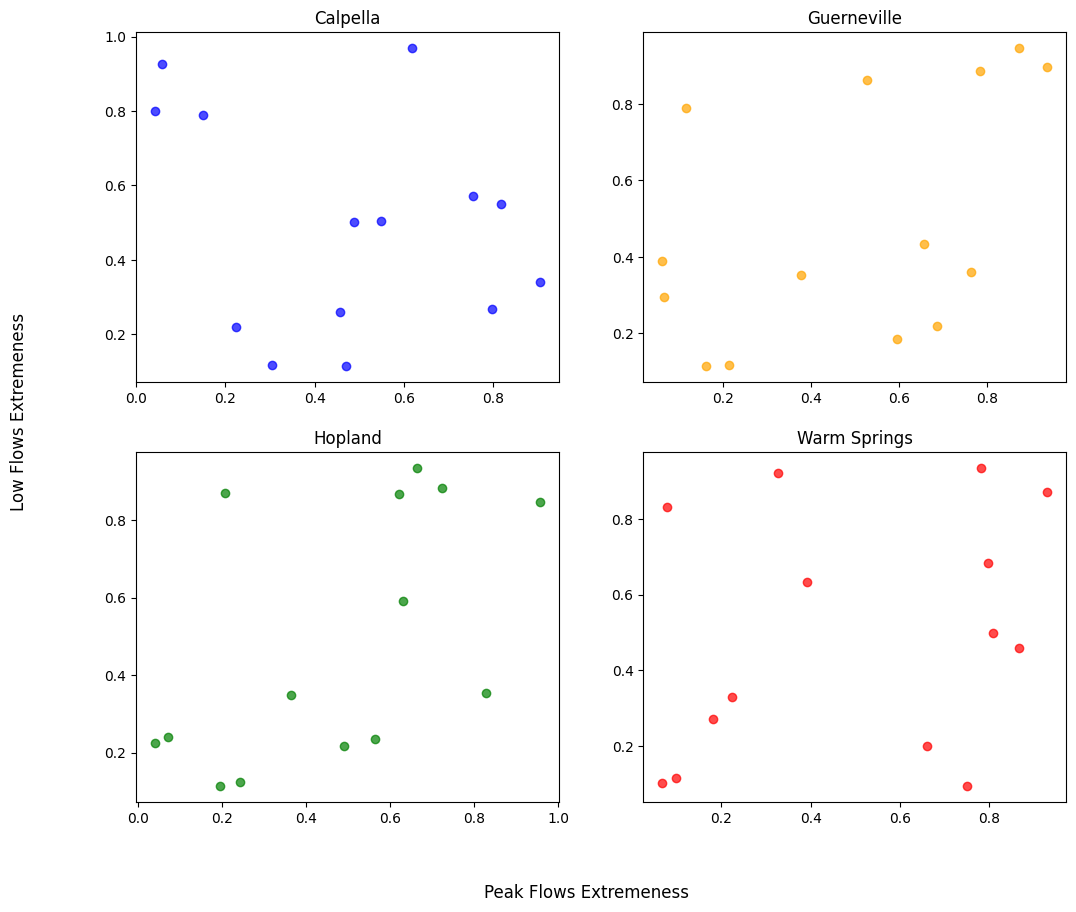

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].scatter(peak_flows['Calpella'][:-1], low_flows['Calpella'], label='Calpella', alpha=0.7, color='blue')
ax[0, 0].set_title('Calpella')
ax[0, 1].scatter(peak_flows['Guerneville'][:-1], low_flows['Guerneville'], label='Guerneville', alpha=0.7, color='orange')
ax[0, 1].set_title('Guerneville')
ax[1, 0].scatter(peak_flows['Hopland'][:-1], low_flows['Hopland'], label='Hopland', alpha=0.7, color='green')
ax[1, 0].set_title('Hopland')
ax[1, 1].scatter(peak_flows['Warm Springs'][:-1], low_flows['Warm Springs'], label='Warm Springs', alpha=0.7, color='red')
ax[1, 1].set_title('Warm Springs')
fig.supxlabel('Peak Flows Extremeness')
fig.supylabel('Low Flows Extremeness')

Peak flow extremeness and low flow extremeness are have basically zero correlation. For extreme years, we're interested in years in top right and bottom left as these represent years with both unusually high peak and unusually low low flows or unusually low peak and unusually high low flows respectively.

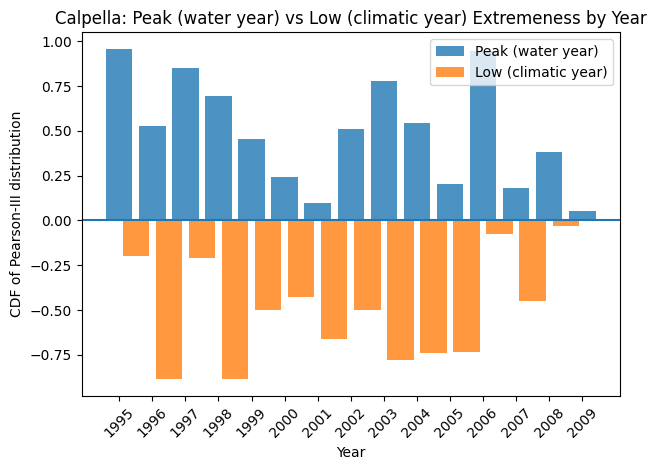

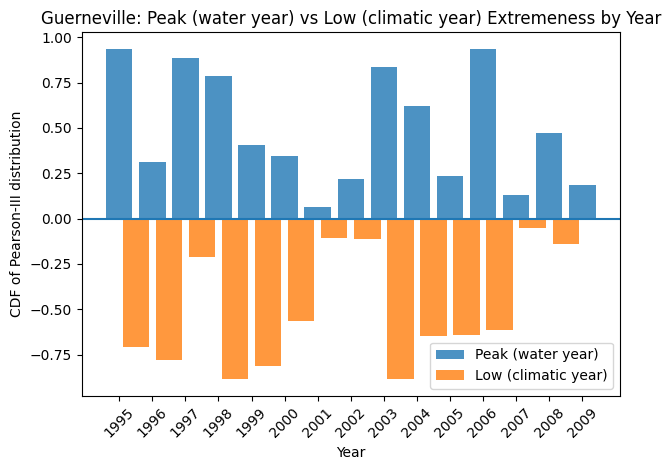

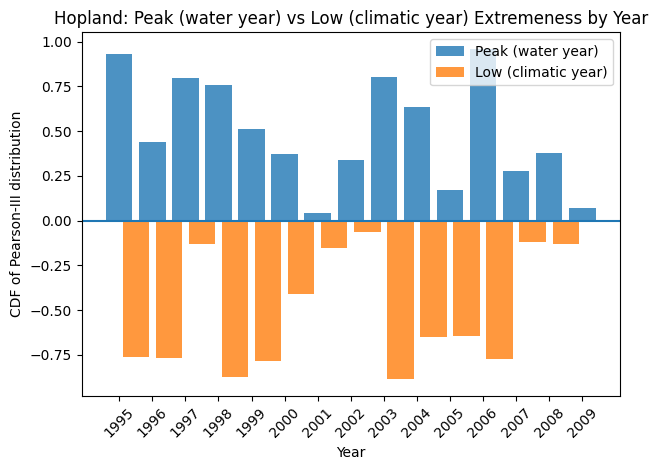

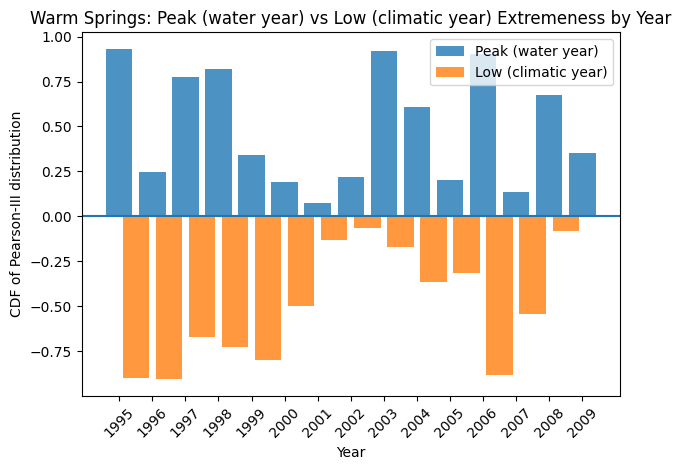

In [ ]:
for basin in basins:
    neg = -(1 - low_flows[basin])
    pos = (1 - peak_flows[basin])

    plt.figure()

    plt.bar(peak_years, pos, label="Peak (water year)", alpha=0.8)

    plt.bar(low_years - 0.5, neg, label="Low (climatic year)", alpha=0.8)

    plt.axhline(0)
    plt.xlabel("Year")
    plt.ylabel("1 - Pearson-III CDF Extremeness")
    plt.title(f"{basin}: Peak (water year) vs Low (climatic year) Extremeness by Year")
    plt.legend()

    # Keep ticks aligned to actual water years
    plt.xticks(peak_years, rotation=45)

    plt.tight_layout()
    plt.savefig(f"{basin}_wet_dry_extremeness.png", dpi=300, bbox_inches="tight")
    plt.show()